# Preparação de Estados

###### PLESCH, Martin; BRUKNER, Časlav. Quantum-state preparation with universal gate decompositions. Physical Review A—Atomic, Molecular, and Optical Physics, v. 83, n. 3, p. 032302, 2011.

O nosso objetivo é ir do estado $|\Phi\rangle=|0000\rangle$ para o estado $|\Psi\rangle=0.7032|0000\rangle+0.0707|0101\rangle+0.0224|0110\rangle+0.0707|1001\rangle-0.0224|1010\rangle+0.7032|1100\rangle$.

### Imports

In [1]:
from qiskit.quantum_info.states.statevector import Statevector
from qiskit.quantum_info.states.utils import schmidt_decomposition
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from numpy import arccos, sqrt, array
from numpy.linalg import norm
from qclib.unitary import unitary

qc = QuantumCircuit(4)

### Fase 1 - Encontrar a decomposição de Schmidt de $|\Psi\rangle$ e aplicar seus respectivos coeficientes aos $2$ primeiros qubits de $|\Phi\rangle$

In [3]:
psi = Statevector([
    0.70320694, 0.0, 0.0, 0.0,
    0.0, 0.07071068, 0.02236068, 0.0,
    0.0, 0.07071068, -0.02236068, 0.0,
    0.70320694, 0.0, 0.0, 0.0
])
psi_s = schmidt_decomposition(psi, [0,1])
for (coeff, sv1, sv2) in psi_s:
    print(coeff)

0.9944847917028833
0.10000000266062396
0.03162277691988482


O estado abaixo é o estado que recebemos como saída da função $schmidt\_decomposition$:

$0.9945\left(- \frac{\sqrt{2}}{2} |00\rangle- \frac{\sqrt{2}}{2} |11\rangle\right)\left(- |00\rangle\right)+0.1\left(- \frac{\sqrt{2}}{2} |01\rangle- \frac{\sqrt{2}}{2} |10\rangle\right)\left(- |01\rangle\right)+0.0316\left(- \frac{\sqrt{2}}{2} |01\rangle+\frac{\sqrt{2}}{2} |10\rangle\right)\left(- |10\rangle\right)$

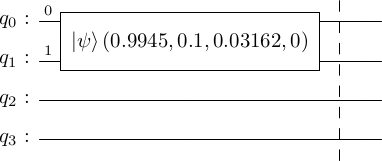

In [4]:
alpha_1, alpha_2, alpha_3 = 0.9944847917028833, 0.10000000266062396, 0.03162277691988482

#preparando os dois primeiros qubits
qc.initialize([alpha_1, alpha_2, alpha_3, 0], [0, 1])
qc.barrier()
qc.draw(output="latex")

A função [initialize](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.Initialize) chama a classe [StatePreparation](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.StatePreparation). Na página da classe StatePreparation, há uma referência ao artigo [Shende, Bullock, Markov. Synthesis of Quantum Logic Circuits (2004)](https://arxiv.org/abs/quant-ph/0406176v5)

### Fase 2 - "Copiando" os dois primeiros qubits de $|\Phi\rangle$ para os dois últimos qubits de $|\Phi\rangle$

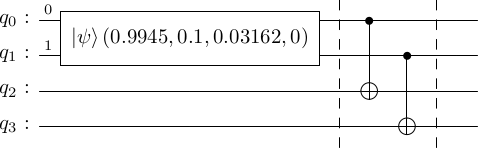

In [5]:
qc.cx(0, 2)
qc.cx(1, 3)
qc.barrier()
qc.draw(output="latex")

### Fase 3 - Transformando os dois primeiros qubits de $|\Phi\rangle$ nos dois primeiros qubits de $|\Psi\rangle$

### Fase 4 - Transformando os dois últimos qubits de $|\Phi\rangle$ nos dois últimos qubits de $|\Psi\rangle$